# Punto 1

In [1]:
import struct

numero = 1.8
bytes_rep = struct.pack('>f', numero)
int_rep = struct.unpack('>I', bytes_rep)[0]
bin_rep = bin(int_rep)[2:].zfill(32)
hex_rep = hex(int_rep)[2:].zfill(8)

print("Representación en binario:", bin_rep)
print("Representación en hexadecimal:", hex_rep)


Representación en binario: 00111111111001100110011001100110
Representación en hexadecimal: 3fe66666


# Punto 2

Para x=0:
  Aproximación: 1
  Valor exacto:  1.00000000000000
  Error absoluto: 0
  Error relativo: 0.00%
Para x=1:
  Aproximación: 1.26615999392846
  Valor exacto:  1.25992104989487
  Error absoluto: 0.00623894403358394
  Error relativo: 0.50%
Para x=2:
  Aproximación: 5.80578025908175
  Valor exacto:  1.44224957030741
  Error absoluto: 4.36353068877435
  Error relativo: 302.55%


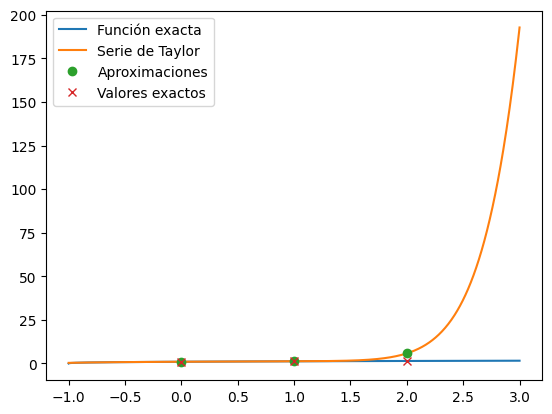

In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir la función y los puntos de expansión
x = sp.symbols('x')
f = (x+1)**(1/3)
expansion_points = [0, 1, 2]

# Definir la serie de Taylor
taylor_series = sp.series(f, x, x0=0, n=10).removeO()

# Evaluar la serie de Taylor en los puntos de expansión
approximations = []
for point in expansion_points:
    approximations.append(taylor_series.subs(x, point))

# Evaluar la función exacta en los puntos de expansión
exact_values = [sp.N(f.subs(x, point)) for point in expansion_points]

# Calcular los errores absoluto y relativo porcentual
errors_abs = [abs(approx - exact) for approx, exact in zip(approximations, exact_values)]
errors_rel = [error/exact*100 for error, exact in zip(errors_abs, exact_values)]

# Imprimir los resultados
for i in range(len(expansion_points)):
    print(f"Para x={expansion_points[i]}:")
    print(f"  Aproximación: {approximations[i]}")
    print(f"  Valor exacto:  {exact_values[i]}")
    print(f"  Error absoluto: {errors_abs[i]}")
    print(f"  Error relativo: {errors_rel[i]:.2f}%")

# Graficar la función exacta y las aproximaciones
x_vals = np.linspace(-1, 3, 1000)
f_vals = np.array([sp.N(f.subs(x, val)) for val in x_vals])
taylor_vals = np.array([sp.N(taylor_series.subs(x, val)) for val in x_vals])
approximation_vals = np.array([sp.N(taylor_series.subs(x, point)) for point in expansion_points])
exact_vals = np.array([sp.N(f.subs(x, point)) for point in expansion_points])

plt.plot(x_vals, f_vals, label="Función exacta")
plt.plot(x_vals, taylor_vals, label="Serie de Taylor")
plt.plot(expansion_points, approximation_vals, "o", label="Aproximaciones")
plt.plot(expansion_points, exact_vals, "x", label="Valores exactos")
plt.legend()
plt.show()